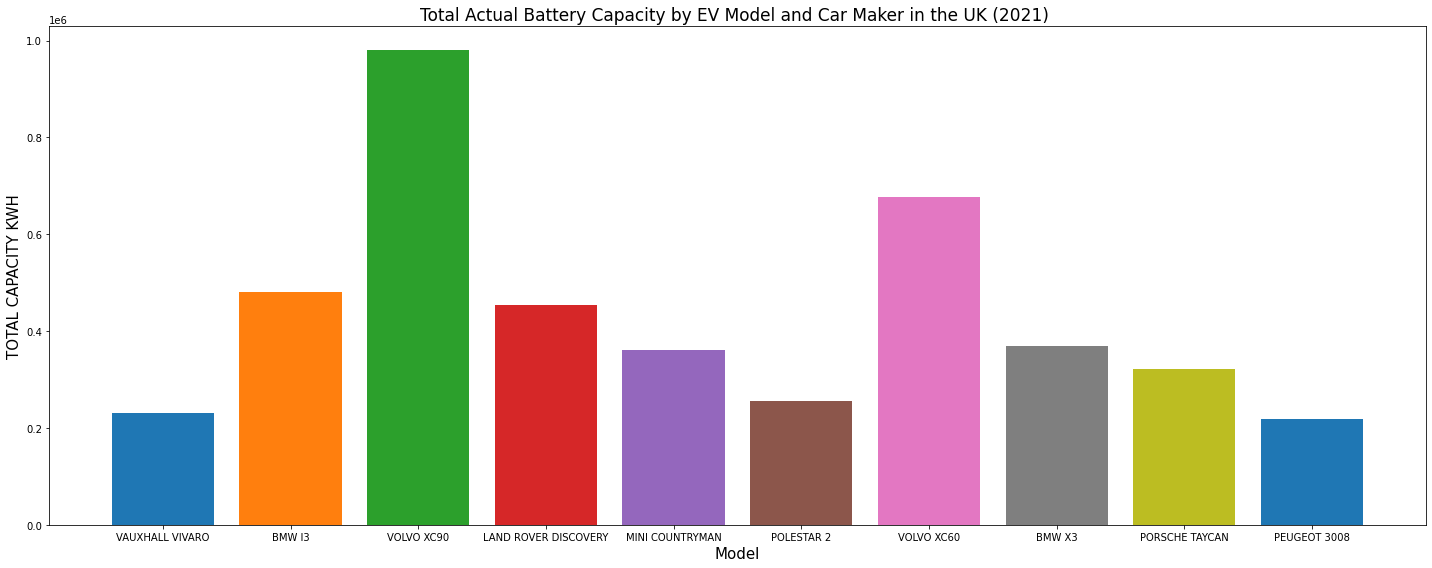

In [3]:
####### 5_3 Total Actual Battery Capacity by EV Model and Car Maker in the UK (2021) ################
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'url_to_your_csv_file' with the raw GitHub URL of your CSV file
csv_url = r'https://raw.githubusercontent.com/varunraaju/Battery_Cycle_Plots/main/5_3/VEH0171b_GenModels.csv?token=GHSAT0AAAAAACFKR6ADUQSDBS7INKFLFWJGZGI5YSA'

# Read the CSV file into a DataFrame, skipping the first 4 rows
df = pd.read_csv(csv_url, skiprows=4)

# Save the first four columns in a separate DataFrame with the renamed names
first_four_columns = df.iloc[:, :6].rename(columns={df.columns[2]: 'BODY TYPE', df.columns[3]: 'MAKE', df.columns[4]: 'MODEL', df.columns[5]: 'FUEL'})

# Drop the first two columns from the original DataFrame
df.drop(df.columns[:4], axis=1, inplace=True)

# Create a new DataFrame to store the sums
sum_df = pd.DataFrame(index=df.index)

# Iterate through columns and group by left 4 characters of the header
for col in df.columns:
    header_prefix = col[:4]
    if header_prefix not in sum_df.columns:
        selected_columns = df.loc[:, df.columns.str[:4] == header_prefix]
        sum_df[header_prefix] = pd.to_numeric(selected_columns.stack(), errors='coerce').groupby(level=0).sum()

# Print the first few rows of the new DataFrame with sums and the first four columns unchanged
result_df = pd.concat([first_four_columns, sum_df], axis=1)
new_df = result_df.drop(result_df.columns[[0, 1, 6, 7]], axis=1)

# Calculate the sum of numbers from the 5th column till the last column and add a new "TOTAL" column
new_df['TOTAL'] = new_df[new_df.columns[2:]].sum(axis=1)

# Filter out rows where 'MODEL' column contains the string "MISSING"
clean_data = new_df[~new_df['MODEL'].str.contains("MISSING")]

##################################################################
# Manually replace the EV battery capacity data file path

csv_url2 = r'https://raw.githubusercontent.com/varunraaju/Battery_Cycle_Plots/main/5_3/EV_CAPACITY.csv?token=GHSAT0AAAAAACFKR6ADB5G3FDKJEW4Q7TASZGI5Y5Q'
df2 = pd.read_csv(csv_url2)
df2.columns = df2.columns.str.upper()
# print(df2)
###################################################################
# merging both the data frames
clean_data = clean_data.merge(df2[['MODEL', 'BODY_TYPE', 'CAPACITY_KWH']], on='MODEL', how='left')

# Drop rows with NaN values in the 'BODY_TYPE' column
clean_data.dropna(subset=['BODY_TYPE'], inplace=True)

# List of body types to categorize
main_body_types = ['Sedan', 'SUV', 'Hatchback', 'Van']

# Categorize 'BODY TYPE' column as Sedan, SUV, Hatchback, Van, and "Others"
clean_data['BODY_TYPE_CATEGORIZED'] = clean_data['BODY_TYPE'].where(clean_data['BODY_TYPE'].isin(main_body_types), 'Others')
########################################################################
clean_data['TOTAL_CAPACITY'] = clean_data['CAPACITY_KWH']* clean_data['TOTAL']
# for year 2021, taking top 10 models
clean_data = clean_data.sort_values(by='2021', ascending=False)
top_10_2021 = clean_data.head(10)
bar_data = top_10_2021[['MODEL','TOTAL_CAPACITY']]
# print(bar_data)

###############################################################
# Plot the bar chart
plt.figure(figsize=(20, 8))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']
plt.bar(bar_data['MODEL'], bar_data['TOTAL_CAPACITY'],color = colors)
plt.xlabel('Model',fontsize = 15)
plt.ylabel('TOTAL CAPACITY KWH',fontsize = 15)
plt.title('Total Actual Battery Capacity by EV Model and Car Maker in the UK (2021) ',fontsize = 17)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

